In [3]:
%reload_ext autoreload
%load_ext autotime
%reload_ext line_profiler
%autoreload 2

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import sys
sys.path.insert(0,'../../')

import pandas as pd
import numpy as np

pd.options.display.max_columns = 999
pd.options.display.max_rows = 1999
pd.options.display.max_colwidth = 100

import glob

from scripts.manipulate import normalize_cols, padronize_str
from scripts.orcamento_sp import get_despesas, get_receita
from scripts.orcamento_sp import generic_group
from scripts.visualization import get_px_values, update_layout

import plotly.express as px

import math

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 13.7 ms (started: 2021-04-22 19:39:55 -03:00)


### Despesas

In [2]:
## CHECA SE ARQUIVOS SAO CONSISTENTES ENTRE OS ANOS
files = glob.glob('../../data/orcamento_consolidado/execucao/*.csv')
df_despesa, all_cols = get_despesas(files)

2010
../../data/orcamento_consolidado/execucao/orcamento_executado_2010.csv.csv
2011
../../data/orcamento_consolidado/execucao/orcamento_executado_2011.csv
2012
../../data/orcamento_consolidado/execucao/orcamento_executado_2012.csv
2013
../../data/orcamento_consolidado/execucao/orcamento_executado_2013.csv
2014
../../data/orcamento_consolidado/execucao/orcamento_executado_2014.csv
2015
../../data/orcamento_consolidado/execucao/orcamento_executado_2015.csv
2016
../../data/orcamento_consolidado/execucao/orcamento_executado_2016.csv
2017
../../data/orcamento_consolidado/execucao/orcamento_executado_2017.csv
2018
../../data/orcamento_consolidado/execucao/orcamento_executado_2018.csv
2019
../../data/orcamento_consolidado/execucao/orcamento_executado_2019.csv
2020
../../data/orcamento_consolidado/execucao/orcamento_executado_2020.csv
2021
../../data/orcamento_consolidado/execucao/orcamento_executado_2021.csv
time: 10.9 s (started: 2021-04-22 11:48:14 -03:00)


In [5]:
### elementos da previdencia
funcoes_interesse = [
    '10 - SAUDE',
    '12 - EDUCACAO',
    '19 - CIENCIA E TECNOLOGIA',
    '09 - PREVIDENCIA SOCIAL',
    '06 - SEGURANCA PUBLICA',
]
mask = df_despesa['funcao'].isin(funcoes_interesse)
generic_group(
    df_despesa[mask], 
    group_cols=['ano','funcao'],
    numeric_cols=['dotacao_inicial'],
    sort_cols = ["funcao", "ano"]
)

ano                     funcao  dotacao_inicial
59  2021  19 - CIENCIA E TECNOLOGIA     1.513406e+09
54  2020  19 - CIENCIA E TECNOLOGIA     1.965812e+09
49  2019  19 - CIENCIA E TECNOLOGIA     1.877747e+09
44  2018  19 - CIENCIA E TECNOLOGIA     1.706173e+09
39  2017  19 - CIENCIA E TECNOLOGIA     1.641950e+09
34  2016  19 - CIENCIA E TECNOLOGIA     1.587571e+09
29  2015  19 - CIENCIA E TECNOLOGIA     1.516750e+09
24  2014  19 - CIENCIA E TECNOLOGIA     1.436620e+09
19  2013  19 - CIENCIA E TECNOLOGIA     1.447495e+09
14  2012  19 - CIENCIA E TECNOLOGIA     1.388150e+09
9   2011  19 - CIENCIA E TECNOLOGIA     1.008992e+09
4   2010  19 - CIENCIA E TECNOLOGIA     8.841805e+08
58  2021              12 - EDUCACAO     4.967162e+10
53  2020              12 - EDUCACAO     4.708884e+10
48  2019              12 - EDUCACAO     4.629733e+10
43  2018              12 - EDUCACAO     4.328335e+10
38  2017              12 - EDUCACAO     4.230241e+10
33  2016              12 - EDUCACAO     4.080913e+10
28  2015              12 - EDUCACAO     4.050623e+10
23  2014              12 - EDUCACAO     3.819103e+10
18  2013              12 - EDUCACAO     3.496630e+10
13  2012              12 - EDUCACAO     3.150294e+10
8   2011              12 - EDUCACAO     2.831822e+10
3   2010              12 - EDUCACAO     2.360544e+10
57  2021                 10 - SAUDE     2.808830e+10
52  2020                 10 - SAUDE     2.823038e+10
47  2019                 10 - SAUDE     2.700279e+10
42  2018                 10 - SAUDE     2.579997e+10
37  2017                 10 - SAUDE     2.535852e+10
32  2016                 10 - SAUDE     2.410788e+10
27  2015                 10 - SAUDE     2.329834e+10
22  2014                 10 - SAUDE     2.131641e+10
17  2013                 10 - SAUDE     1.865758e+10
12  2012                 10 - SAUDE     1.691833e+10
7   2011                 10 - SAUDE     1.590418e+10
2   2010                 10 - SAUDE     1.339788e+10
56  2021    09 - PREVIDENCIA SOCIAL     4.383466e+10
51  2020    09 - PREVIDENCIA SOCIAL     4.160252e+10
46  2019    09 - PREVIDENCIA SOCIAL     3.759295e+10
41  2018    09 - PREVIDENCIA SOCIAL     3.443774e+10
36  2017    09 - PREVIDENCIA SOCIAL     3.198748e+10
31  2016    09 - PREVIDENCIA SOCIAL     2.991881e+10
26  2015    09 - PREVIDENCIA SOCIAL     2.842354e+10
21  2014    09 - PREVIDENCIA SOCIAL     2.603136e+10
16  2013    09 - PREVIDENCIA SOCIAL     2.364270e+10
11  2012    09 - PREVIDENCIA SOCIAL     2.112737e+10
6   2011    09 - PREVIDENCIA SOCIAL     1.786693e+10
1   2010    09 - PREVIDENCIA SOCIAL     1.786311e+10
55  2021     06 - SEGURANCA PUBLICA     2.190629e+10
50  2020     06 - SEGURANCA PUBLICA     2.446502e+10
45  2019     06 - SEGURANCA PUBLICA     2.230758e+10
40  2018     06 - SEGURANCA PUBLICA     2.138809e+10
35  2017     06 - SEGURANCA PUBLICA     2.136270e+10
30  2016     06 - SEGURANCA PUBLICA     2.031971e+10
25  2015     06 - SEGURANCA PUBLICA     2.029350e+10
20  2014     06 - SEGURANCA PUBLICA     1.769831e+10
15  2013     06 - SEGURANCA PUBLICA     1.548880e+10
10  2012     06 - SEGURANCA PUBLICA     1.396355e+10
5   2011     06 - SEGURANCA PUBLICA     1.193390e+10
0   2010     06 - SEGURANCA PUBLICA     1.116029e+10

time: 97 ms (started: 2021-04-22 11:48:25 -03:00)


In [6]:
grupo = {
    '31' : 'PESSOAL E ENCARGOS SOCIAIS',
    '32' : 'JUROS E ENCARGOS DA DIVIDA',
    '33' : 'OUTRAS DESPESAS CORRENTES',
    '44' : 'INVESTIMENTOS',
    '45' : 'INVERSOES FINANCEIRAS',
    '46' : 'AMORTIZACAO DE DIVIDA',
    '99' : 'RESERVA DE CONTINGENCIA'
}

df_despesa['grupo'] = df_despesa['elemento'].apply(lambda x: x[:2]).replace(grupo)

generic_group(
    df_despesa, 
    group_cols=['ano','grupo'],
    numeric_cols=['dotacao_inicial'],
    sort_cols = ["grupo", "ano"]
)

ano                       grupo  dotacao_inicial
84  2021     RESERVA DE CONTINGENCIA     5.100000e+07
77  2020     RESERVA DE CONTINGENCIA     4.999996e+07
70  2019     RESERVA DE CONTINGENCIA     5.000000e+07
63  2018     RESERVA DE CONTINGENCIA     4.650000e+07
56  2017     RESERVA DE CONTINGENCIA     2.000000e+07
49  2016     RESERVA DE CONTINGENCIA     1.000000e+07
42  2015     RESERVA DE CONTINGENCIA     1.000000e+07
35  2014     RESERVA DE CONTINGENCIA     1.000000e+07
28  2013     RESERVA DE CONTINGENCIA     1.000000e+07
21  2012     RESERVA DE CONTINGENCIA     1.000000e+07
14  2011     RESERVA DE CONTINGENCIA     1.000000e+07
6   2010     RESERVA DE CONTINGENCIA     1.000000e+07
83  2021  PESSOAL E ENCARGOS SOCIAIS     1.262298e+11
76  2020  PESSOAL E ENCARGOS SOCIAIS     1.247892e+11
69  2019  PESSOAL E ENCARGOS SOCIAIS     1.199757e+11
62  2018  PESSOAL E ENCARGOS SOCIAIS     1.146541e+11
55  2017  PESSOAL E ENCARGOS SOCIAIS     1.106204e+11
48  2016  PESSOAL E ENCARGOS SOCIAIS     1.046430e+11
41  2015  PESSOAL E ENCARGOS SOCIAIS     1.020905e+11
34  2014  PESSOAL E ENCARGOS SOCIAIS     9.341950e+10
27  2013  PESSOAL E ENCARGOS SOCIAIS     8.377954e+10
20  2012  PESSOAL E ENCARGOS SOCIAIS     5.617269e+10
13  2011  PESSOAL E ENCARGOS SOCIAIS     4.899637e+10
5   2010  PESSOAL E ENCARGOS SOCIAIS     4.540395e+10
82  2021   OUTRAS DESPESAS CORRENTES     1.112370e+11
75  2020   OUTRAS DESPESAS CORRENTES     1.101683e+11
68  2019   OUTRAS DESPESAS CORRENTES     1.023302e+11
61  2018   OUTRAS DESPESAS CORRENTES     9.503585e+10
54  2017   OUTRAS DESPESAS CORRENTES     9.140113e+10
47  2016   OUTRAS DESPESAS CORRENTES     9.004733e+10
40  2015   OUTRAS DESPESAS CORRENTES     8.883034e+10
33  2014   OUTRAS DESPESAS CORRENTES     8.187233e+10
26  2013   OUTRAS DESPESAS CORRENTES     7.594447e+10
19  2012   OUTRAS DESPESAS CORRENTES     8.856374e+10
12  2011   OUTRAS DESPESAS CORRENTES     7.871892e+10
4   2010   OUTRAS DESPESAS CORRENTES     6.778467e+10
81  2021  JUROS E ENCARGOS DA DIVIDA     1.351236e+10
74  2020  JUROS E ENCARGOS DA DIVIDA     1.215073e+10
67  2019  JUROS E ENCARGOS DA DIVIDA     1.226605e+10
60  2018  JUROS E ENCARGOS DA DIVIDA     1.152236e+10
53  2017  JUROS E ENCARGOS DA DIVIDA     8.864596e+09
46  2016  JUROS E ENCARGOS DA DIVIDA     1.093594e+10
39  2015  JUROS E ENCARGOS DA DIVIDA     1.072785e+10
32  2014  JUROS E ENCARGOS DA DIVIDA     9.691962e+09
25  2013  JUROS E ENCARGOS DA DIVIDA     8.552956e+09
18  2012  JUROS E ENCARGOS DA DIVIDA     8.245688e+09
11  2011  JUROS E ENCARGOS DA DIVIDA     7.152004e+09
3   2010  JUROS E ENCARGOS DA DIVIDA     5.804679e+09
80  2021               INVESTIMENTOS     1.238731e+10
73  2020               INVESTIMENTOS     1.018687e+10
66  2019               INVESTIMENTOS     1.289667e+10
59  2018               INVESTIMENTOS     1.272975e+10
52  2017               INVESTIMENTOS     1.353918e+10
45  2016               INVESTIMENTOS     1.403421e+10
38  2015               INVESTIMENTOS     1.636890e+10
31  2014               INVESTIMENTOS     1.534933e+10
24  2013               INVESTIMENTOS     1.396524e+10
17  2012               INVESTIMENTOS     1.014246e+10
10  2011               INVESTIMENTOS     1.064001e+10
2   2010               INVESTIMENTOS     1.261285e+10
79  2021       INVERSOES FINANCEIRAS     3.611328e+09
72  2020       INVERSOES FINANCEIRAS     4.161306e+09
65  2019       INVERSOES FINANCEIRAS     5.040531e+09
58  2018       INVERSOES FINANCEIRAS     5.762568e+09
51  2017       INVERSOES FINANCEIRAS     6.017076e+09
44  2016       INVERSOES FINANCEIRAS     7.212862e+09
37  2015       INVERSOES FINANCEIRAS     6.910278e+09
30  2014       INVERSOES FINANCEIRAS     6.186880e+09
23  2013       INVERSOES FINANCEIRAS     5.468738e+09
16  2012       INVERSOES FINANCEIRAS     6.609708e+09
9   2011       INVERSOES FINANCEIRAS     6.142898e+09
1   2010       INVERSOES FINANCEIRAS     5.274766e+09
78  2021       AMORTIZACAO DE DIVIDA     1.018747e+10
71  2020 

time: 342 ms (started: 2021-04-22 11:48:25 -03:00)


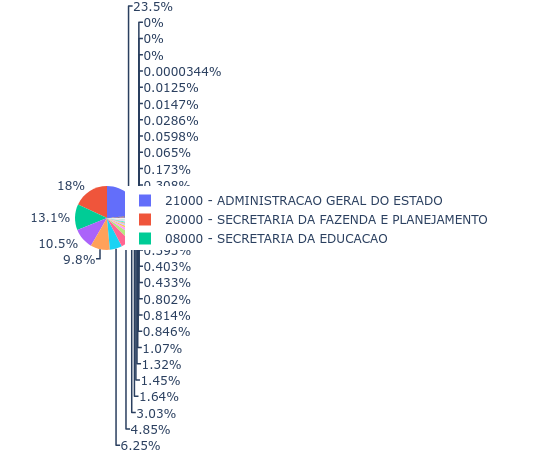

time: 270 ms (started: 2021-04-22 14:30:29 -03:00)


In [82]:
px.pie(df_despesa[df_despesa['ano']==2020], names='orgao', values='empenhado')

In [84]:
259 - 60.8-46.7-34-27.1-25.3-16.2-12.6

36.300000000000004

time: 17.9 ms (started: 2021-04-22 14:43:35 -03:00)


## Receita

In [64]:
files = glob.glob('../../data/orcamento_consolidado/receita_arrecadada/*.csv')
df_receita, receita_cols = get_receita(files)
# df_receita[(df_receita['id_origem']=='72') & (df_receita['ano']==2020)]

2010
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2010.csv
2011
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2011.csv
2012
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2012.csv
2013
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2013.csv
2014
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2014.csv
2015
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2015.csv
2016
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2016.csv
2017
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2017.csv
2018
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2018.csv
2019
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2019.csv
2020
../../data/orcamento_consolidado/receita_arrecadada/orcamento_arrecadado_2020.csv
2021
../../data/orcamento_consolidado/recei

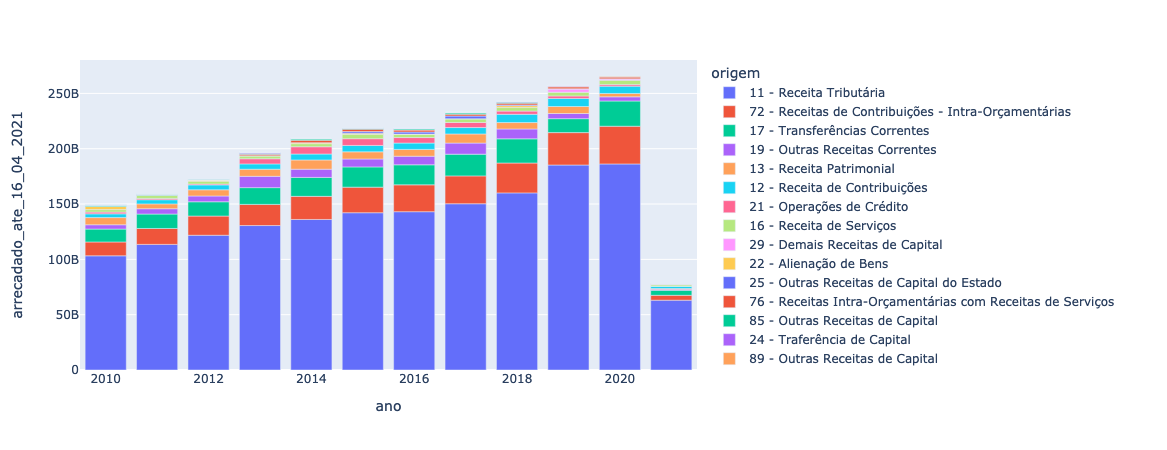

time: 91.5 ms (started: 2021-04-22 14:20:19 -03:00)


In [74]:
#### ORIGEM

fontes_receita = generic_group(
    df_receita, 
    group_cols=['ano','origem'],
    numeric_cols=['arrecadado_ate_16_04_2021'],
    sort_cols = ["arrecadado_ate_16_04_2021", "ano"]
)
px.bar(fontes_receita, x='ano', y='arrecadado_ate_16_04_2021', color='origem')

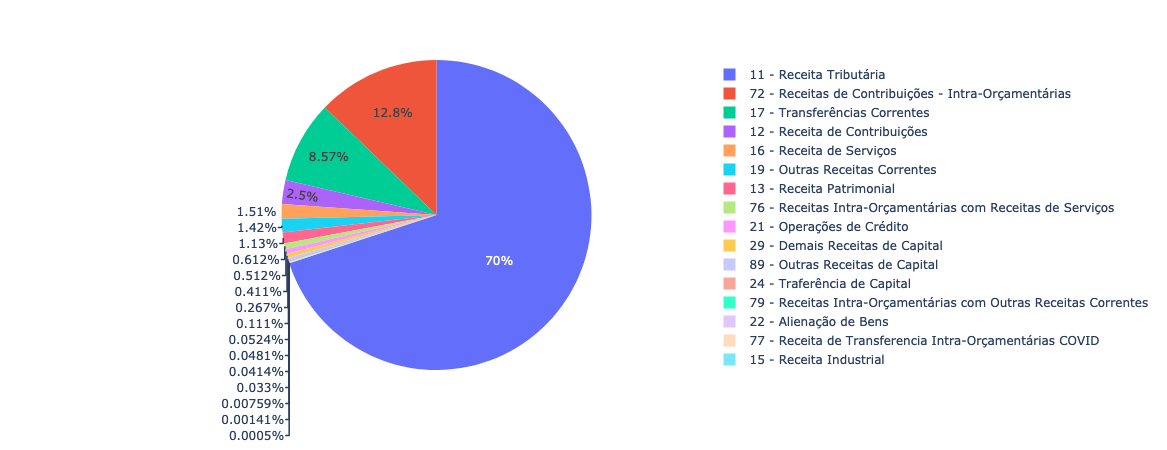

time: 39.5 ms (started: 2021-04-22 13:09:00 -03:00)


In [69]:
px.pie(fontes_receita[fontes_receita['ano']==2020], names='origem', values='arrecadado_ate_16_04_2021')

time: 16.1 ms (started: 2021-04-22 15:07:21 -03:00)


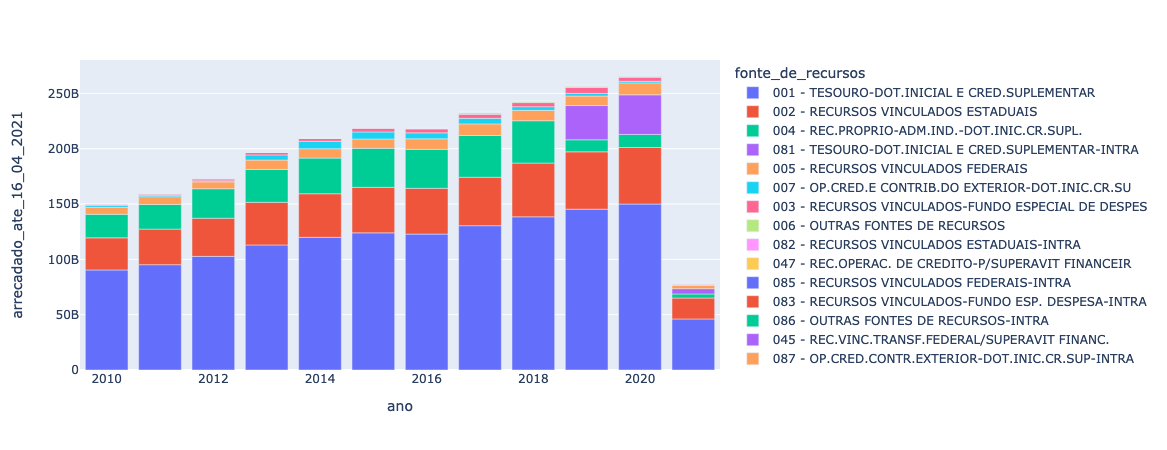

time: 106 ms (started: 2021-04-22 13:09:27 -03:00)


In [71]:
### FONTE RECEITA
fontes_receita = generic_group(
    df_receita, 
    group_cols=['ano','fonte_de_recursos'],
    numeric_cols=['arrecadado_ate_16_04_2021'],
    sort_cols = ["arrecadado_ate_16_04_2021", "ano"]
)
px.bar(fontes_receita, x='ano', y='arrecadado_ate_16_04_2021', color='fonte_de_recursos')

### TAMOIOS

In [144]:
## '26782160624970000 - NOVA TAMOIOS - CONTORNOS',
## '26782160625050000 - APOIO A PPP RODOVIA TAMOIOS-SERRA'
mask = df_despesa['funcional_programatica'].isin(
    [
        '26782160624970000 - NOVA TAMOIOS - CONTORNOS',
#         '26782160625050000 - APOIO A PPP RODOVIA TAMOIOS-SERRA'
    ]
)
tamoios = df_despesa[mask]

time: 23.5 ms (started: 2021-04-22 16:20:23 -03:00)


In [145]:
tamoios_ano = tamoios.groupby(by='ano', as_index=False).sum()

time: 19.7 ms (started: 2021-04-22 16:20:24 -03:00)


In [146]:
for col in tamoios_ano.columns:
    tamoios_ano[f"{col}_cumsum"] = tamoios_ano[col].cumsum()

time: 20.7 ms (started: 2021-04-22 16:20:24 -03:00)


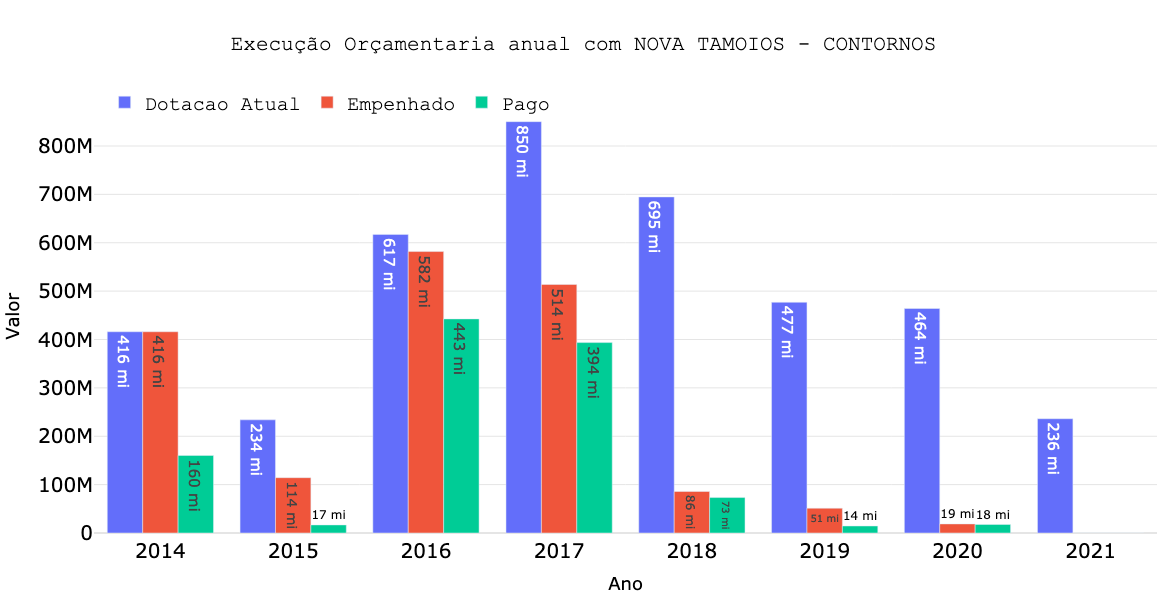

time: 180 ms (started: 2021-04-22 16:20:24 -03:00)


In [147]:
x_values, y_values, colors = get_px_values(
    tamoios_ano,
    x_col="ano",
    y_cols=["dotacao_atual", "empenhado", "pago"],
    color_names=["dotacao atual", "empenhado", "pago"],
)

fig = px.bar(
    x=x_values,
    y=y_values,
    color=colors,
    barmode="group",
    labels={"x": "Ano", "y": "Valor"},
    text=[millify(n) for n in y_values],
)

fig.update_layout(
    title_text="Execução Orçamentaria anual com NOVA TAMOIOS - CONTORNOS",
)

fig = update_layout(fig)

fig.write_image("../../images/tamoios/anual_contornos.png", 
                scale=2,
                engine="kaleido",
               )
fig.show()

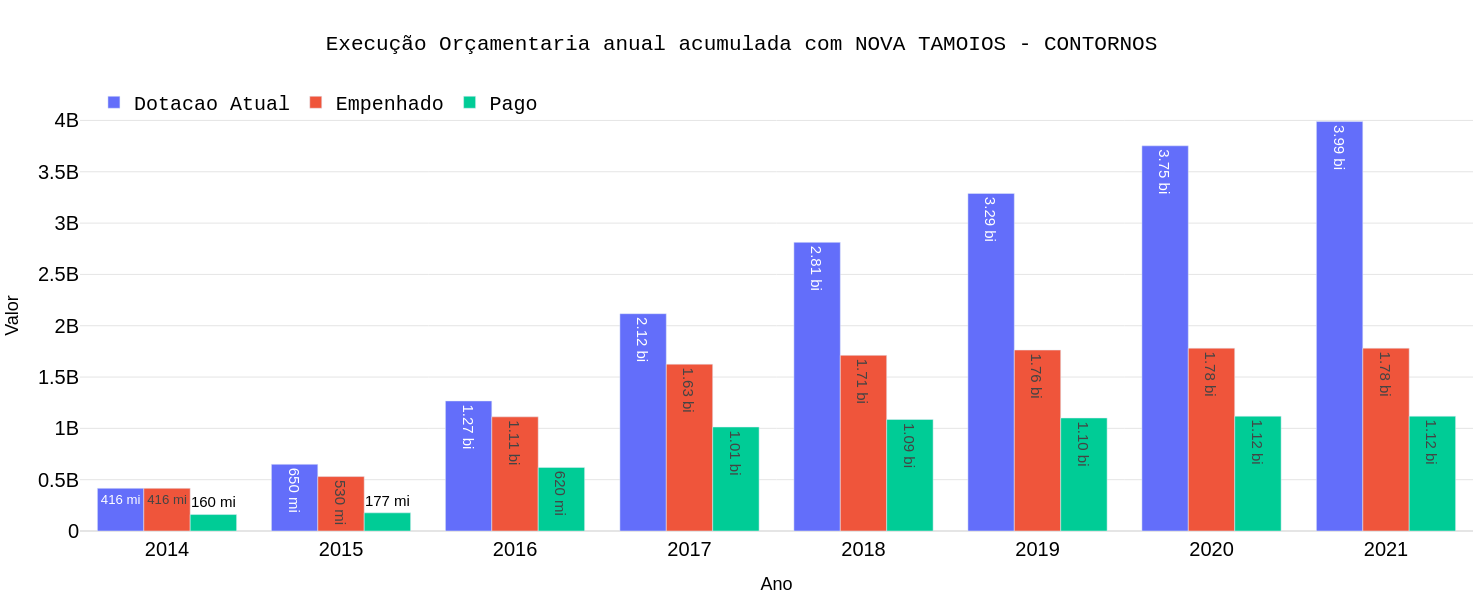

time: 181 ms (started: 2021-04-22 16:20:24 -03:00)


In [148]:
from scripts.visualization import update_layout

x_values, y_values, colors = get_px_values(
    tamoios_ano,
    x_col="ano",
    y_cols=["dotacao_atual_cumsum", "empenhado_cumsum", "pago_cumsum"],
    color_names=["dotacao atual", "empenhado", "pago"],
)

fig = px.bar(
    x=x_values,
    y=y_values,
    color=colors,
    barmode="group",
    labels={"x": "Ano", "y": "Valor"},
    text=[millify(n) for n in y_values],
)

fig = fig.update_layout(
    title_text="Execução Orçamentaria anual acumulada com NOVA TAMOIOS - CONTORNOS",
)

fig = update_layout(fig)


fig.write_image("../../images/tamoios/anual_acumulado_contornos.png", 
                scale=2,
                engine="kaleido",
               )


fig.show()

In [149]:
tamoios_ano[['ano','dotacao_atual','empenhado','pago']]

ano  dotacao_atual    empenhado         pago
0  2014    416000000.0  415999104.0  160304416.0
1  2015    233858384.0  114356632.0   16714362.0
2  2016    617270016.0  581802560.0  442602592.0
3  2017    850334592.0  513745120.0  393632256.0
4  2018    694713536.0   85780080.0   73303984.0
5  2019    476920000.0   51267808.0   14500000.0
6  2020    464073408.0   18784000.0   17584000.0
7  2021    236246656.0          0.0          0.0

time: 22.5 ms (started: 2021-04-22 16:20:24 -03:00)
